# CBU5201  mini-project

# 1 Author

Student Name: Yiran Ma

Student ID: 221165681


# 2 Problem formulation

## Introduction

The goal of this mini-project is to develop a machine learning model capable of predicting the veracity of narrated stories based on audio recordings.      Given an input audio file lasting between 3 to 5 minutes, the model should classify the story as either true or not true.

## The Machine Learning Problem

The problem can be formulated as a binary classification task where the dataset consists of audio recordings along with two attributes: Language and Story Type.      Each recording has been labeled as being either a true story or not, serving as our target variable for supervised learning.

## The Interesting

1. **Technological Challenge**: Developing algorithms that can accurately interpret the nuances of spoken language presents a significant technological challenge, especially given the variability in accents, emotions, and speaking styles.
2. **Potential Applications**: Such a system could have applications in various fields, including journalism, law enforcement, psychology, and entertainment, where discerning the authenticity of narratives can be crucial.

## Dataset Description

For this project, we have access to a dataset containing 100 samples.      Each sample includes:
- An audio recording of a narrated story.
- A Language attribute indicating the language of the narration.
- A Story Type attribute specifying whether the story is true or not.

## Approach Overview

The several key steps:

1. **Data Preprocessing**: Convert audio files into a format suitable for analysis and extract relevant features.
2. **Feature Engineering**: Identify and compute acoustic and linguistic features that could help differentiate between true and false stories.
3. **Model Selection and Training**: Experiment with different machine learning models to find the one that best fits the data.
4. **Evaluation**: Assess the performance of the trained models using appropriate metrics.
5. **Integration and Reporting**: Compile findings into a Jupyter notebook, detailing the methodology, implementation, and results.

# 3 Methodology

The following methodology ensures a structured approach to solving the problem of classifying narrated stories as "true" or "not true." It leverages audio signal processing, machine learning techniques, and rigorous performance evaluation.

## 3.1 Overview

The process consists of the following key stages:
1. **Data Collection and Preprocessing**
2. **Feature Extraction**
3. **Model Selection, Training**
4. **Ensemble stage**
5. **DataSet:Exploratory Data Analysis (EDA)**
6. **Result:Performance Evaluation**
7. **Conclusions**

## 3.2 Data Collection and Preprocessing

- **Audio Format Standardization**: Ensure all audio recordings are in a consistent format (e.g., sample rate, bit depth) to maintain uniformity.
- **Normalization**: Normalize the amplitude of the audio signals to ensure that volume levels do not skew the results.

## 3.3 Feature Extraction

Feature extraction transforms audio signals into meaningful numerical representations for machine learning models.

## 3.4 Model Selection, Training

### 3.4.1 Data Splitting

- Split the dataset into **train (70%)**, **validation (15%)**, and **test (15%)**.

### 3.4.2 Model Choices

Experiment  the different models.

### 3.4.3 Model Training
Train the models with hyperparameter tuning:
- Use Grid Search or Random Search to optimize hyperparameters.

## 3.5 Ensemble stage

The ensemble stage aims to combine multiple models to improve the robustness and accuracy of predictions. 

- **Stacking**: Implement stacking by training a meta-model on top of the predictions made by several base models. The meta-model learns how to best combine the predictions of the base models.

## 3.6 DataSet: Exploratory Data Analysis (EDA)

Exploratory Data Analysis is crucial for understanding the characteristics of the dataset before applying machine learning models. It helps in identifying patterns, anomalies, and potential issues with the data. 

- **Statistical Summary**: Compute basic statistics Like the features I extracted.

- **Distribution Analysis**: Examine the distribution of each feature using histograms or kernel density plots. This can reveal skewness, kurtosis, and outliers.

- **Correlation Analysis**: Investigate relationships between features using correlation matrices or scatter plots. This can help identify redundant features or multicollinearity issues.

- **Visualization**: Utilize various types of visualizations to gain insights into the data.

## 3.7 Result:Performance Evaluation

Use the following metrics for evaluation:
- **Accuracy**: Overall correctness of predictions.
- **Confusion Matrix**: Visualize TP, FP, TN, FN.
- **Precision, Recall, and F1 Score**: Balance between prediction quality and completeness.

## 3.8 Conclusions

In conclusion, the methodology outlined here provides a comprehensive framework for tackling the problem of classifying narrated stories as "true" or "not true." 


# 4 Implemented ML prediction pipelines

## 4.1 Transformation stage

First of all, We load the data and normalize it

### 4.1.1 Load data

The specific transformations applied to each `.wav` file within the `stories` folder are:

- **Standardization**: Convert each audio file to a target sample rate of 44.1kHz, a bit depth of 16 bits, and set the channel configuration to mono. This ensures that variations in original formats do not introduce unwanted variables.
  
- **Normalization**: Normalize the amplitude of the audio signal to ensure that peak amplitude reaches -3dBFS with a headroom of 0.5 dB, preventing potential clipping and maintaining a consistent volume level across all files.

- **Exporting**: After applying these transformations, the processed audio segments are exported to a new directory (`normalized_segmented_stories`). Each segment is saved with a modified filename that includes an identifier for the segment number.

#### Input and Output

- **Input**:
- A folder (`audio_folder`) containing `.wav` audio files with varying original formats.
- A CSV file (`csv_file_path`) that contains metadata for each audio file, including filename, language (Chinese or English), and story type (True Story or Deceptive Story).

- **Output**:
- Standardized, normalized,`.wav` audio files saved in the folder. 

In [1]:
import os
from pydub import AudioSegment

# Define the target audio format parameters
TARGET_SAMPLE_RATE = 44100  # Target sample rate is 44.1kHz
TARGET_BIT_DEPTH = 16       # Target bit depth is 16 bits

# The path to the folder where the audio files are located
audio_folder = 'stories'
output_folder = 'normalized_stories'  # The path to the folder for normalized audio files
os.makedirs(output_folder, exist_ok=True)  # Ensure the output directory exists

# Loop through all .wav files in the folder
for filename in os.listdir(audio_folder):
    if filename.endswith('.wav'):
        # Build the full file path
        file_path = os.path.join(audio_folder, filename)

        # Load the audio file
        audio = AudioSegment.from_wav(file_path)

        # Set the target audio format
        audio = audio.set_frame_rate(TARGET_SAMPLE_RATE)
        audio = audio.set_sample_width(TARGET_BIT_DEPTH // 8)  # Convert bit depth to byte width
        audio = audio.set_channels(1)  # Assuming we want mono

        # Normalize the audio signal's amplitude
        normalized_audio = audio.normalize(headroom=0.5)  # The headroom parameter is used to set how much dynamic range to preserve

        # Build the output file name and path
        output_filename = f"{filename}"
        output_file_path = os.path.join(output_folder, output_filename)

        # Export the normalized audio file
        normalized_audio.export(output_file_path, format="wav")

        print(f"Normalized and saved {output_filename}.")

print("All files have been processed.")

Normalized and saved 00002.wav.
Normalized and saved 00003.wav.
Normalized and saved 00004.wav.
Normalized and saved 00005.wav.
Normalized and saved 00006.wav.
Normalized and saved 00007.wav.
Normalized and saved 00008.wav.
Normalized and saved 00009.wav.
Normalized and saved 00010.wav.
Normalized and saved 00011.wav.
Normalized and saved 00012.wav.
Normalized and saved 00013.wav.
Normalized and saved 00014.wav.
Normalized and saved 00015.wav.
Normalized and saved 00016.wav.
Normalized and saved 00017.wav.
Normalized and saved 00018.wav.
Normalized and saved 00019.wav.
Normalized and saved 00020.wav.
Normalized and saved 00021.wav.
Normalized and saved 00022.wav.
Normalized and saved 00023.wav.
Normalized and saved 00024.wav.
Normalized and saved 00025.wav.
Normalized and saved 00026.wav.
Normalized and saved 00027.wav.
Normalized and saved 00028.wav.
Normalized and saved 00029.wav.
Normalized and saved 00030.wav.
Normalized and saved 00031.wav.
Normalized and saved 00032.wav.
Normaliz

### 4.1.2 Extraction of common features

In the transformation stage, we extract two key acoustic features from each audio file: Mel-frequency cepstral coefficients (MFCCs) and Root Mean Square (RMS) energy. These features are widely used in speech and audio processing for their ability to capture important characteristics of the audio signal.

- **Input**: The input consists of `.wav` audio files stored in a specified folder (`normalized_stories`). Each file contains spoken stories in either Chinese or English.

- **Output**: Two separate CSV files are generated:
- `new_acoustic_features_mfccs.csv`: Contains extracted MFCC features.
- `new_acoustic_features_rms.csv`: Contains extracted RMS energy features.

#### Feature Extraction Process

1. **MFCC Extraction**:
- MFCCs are extracted using `librosa.feature.mfcc`. We choose 13 MFCC coefficients as they typically provide sufficient information about the spectral envelope of the audio signal.
- The mean of each MFCC coefficient across time frames is calculated to obtain a single representative value per coefficient for each file.

2. **RMS Energy Extraction**:
- RMS energy is computed using `librosa.feature.rms`.
- Similar to MFCCs, the mean RMS value across time frames is calculated to summarize the energy content of the audio file.

#### Rationale for Choosing This Transformation Stage

- **Feature Relevance**: MFCCs and RMS are chosen because they effectively capture the spectral and energy characteristics of the audio signal, which are crucial for differentiating between true and deceptive stories.
  
- **Dimensionality Reduction**: By averaging the features over time frames, we reduce the dimensionality of the data while retaining essential information, making it suitable for machine learning models.

In [2]:
import os
import librosa
import pandas as pd
import numpy as np

# Define the path to the folder where the audio files are located
audio_folder = 'normalized_stories'

# Initialize two lists to store MFCCs and RMS features respectively
mfccs_features_list = []
rms_features_list = []

# Define a threshold to filter out silent segments
SILENCE_THRESHOLD = 0.01  # Can be adjusted according to actual conditions

# Loop through all .wav files in the folder
for filename in os.listdir(audio_folder):
    if filename.endswith('.wav'):
        # Build the full file path
        file_path = os.path.join(audio_folder, filename)

        try:
            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)

            # Check if it is a silent segment
            if np.max(np.abs(y)) < SILENCE_THRESHOLD:
                print(f"Skipping silent file: {filename}")
                continue

            # Dynamically adjust n_fft to fit the audio length
            n_fft = min(2048, len(y))
            hop_length = n_fft // 4  # Typically, n_fft is a quarter of hop_length

            # Extract MFCC features
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length)
            mfccs_mean = np.mean(mfccs.T, axis=0)

            # Extract RMS energy
            rms = librosa.feature.rms(y=y, frame_length=n_fft, hop_length=hop_length)
            rms_mean = np.mean(rms.T, axis=0)

            # Combine MFCC features into a row of data and add to the list
            mfccs_feature_row = {
                'filename': filename,
                **{f'mfcc_{i+1}': val for i, val in enumerate(mfccs_mean)}
            }
            mfccs_features_list.append(mfccs_feature_row)

            # Combine RMS features into a row of data and add to the list
            rms_feature_row = {
                'filename': filename,
                'rms': rms_mean[0]  # Note that we only take the first element of rms_mean, as it is an array of shape (1, n)
            }
            rms_features_list.append(rms_feature_row)

            print(f"{filename} ok")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Create DataFrames and save the results as CSV files
output_mfccs_csv_path = 'new_acoustic_features_mfccs.csv'
output_rms_csv_path = 'new_acoustic_features_rms.csv'

df_mfccs_features = pd.DataFrame(mfccs_features_list)
df_rms_features = pd.DataFrame(rms_features_list)

df_mfccs_features.to_csv(output_mfccs_csv_path, index=False)
df_rms_features.to_csv(output_rms_csv_path, index=False)

print(f"MFCCs features extracted and saved to {output_mfccs_csv_path}.")
print(f"RMS features extracted and saved to {output_rms_csv_path}.")

00002.wav ok
00003.wav ok
00004.wav ok
00005.wav ok
00006.wav ok
00007.wav ok
00008.wav ok
00009.wav ok
00010.wav ok
00011.wav ok
00012.wav ok
00013.wav ok
00014.wav ok
00015.wav ok
00016.wav ok
00017.wav ok
00018.wav ok
00019.wav ok
00020.wav ok
00021.wav ok
00022.wav ok
00023.wav ok
00024.wav ok
00025.wav ok
00026.wav ok
00027.wav ok
00028.wav ok
00029.wav ok
00030.wav ok
00031.wav ok
00032.wav ok
00033.wav ok
00034.wav ok
00035.wav ok
00036.wav ok
00037.wav ok
00038.wav ok
00039.wav ok
00040.wav ok
00041.wav ok
00042.wav ok
00043.wav ok
00044.wav ok
00045.wav ok
00046.wav ok
00047.wav ok
00048.wav ok
00049.wav ok
00050.wav ok
00051.wav ok
00052.wav ok
00053.wav ok
00054.wav ok
00055.wav ok
00056.wav ok
00057.wav ok
00058.wav ok
00059.wav ok
00060.wav ok
00061.wav ok
00062.wav ok
00063.wav ok
00064.wav ok
00065.wav ok
00066.wav ok
00067.wav ok
00068.wav ok
00069.wav ok
00070.wav ok
00071.wav ok
00072.wav ok
00073.wav ok
00074.wav ok
00075.wav ok
00076.wav ok
00077.wav ok
00078.wav ok

**Next, we extract two more features. Please note that the following two features are only used for CNN and its related model training**

### 4.1.3 Extract supplementary features

#### Input
The input for this process is a folder (`normalized_stories`) containing `.wav` audio files. Each file represents an audio story, and the filenames are used as identifiers.

#### Transformations: Feature Extraction
For each audio file, the following transformations and feature extractions are performed:

1. **Zero Crossing Rate (ZCR)**:
- The ZCR is computed using `librosa.feature.zero_crossing_rate(y)`. This feature measures the rate at which the amplitude of the signal changes from positive to negative or vice versa. It's useful for identifying voiced versus unvoiced speech segments and can indicate the presence of silence or noise in the audio.

2. **Spectral Centroid**:
- The spectral centroid is calculated with `librosa.feature.spectral_centroid(y=y, sr=sr)`. This feature indicates where the "center of mass" of the spectrum is located and can be thought of as providing an indication of brightness in the sound. Higher values suggest more high-frequency content, while lower values indicate dominance of low frequencies.

#### Output
The output is a Pandas DataFrame (`df_features`) containing three columns:
- `filename`: Identifies the original audio file.
- `zero_crossing_rate`: The mean zero crossing rate of the audio signal.
- `spectral_centroid`: The mean spectral centroid of the audio signal.

This DataFrame is then optionally saved to a CSV file named `audio_features.csv`.

In [3]:
import os
import librosa
import pandas as pd

# Define the path to the folder containing the audio files
audio_folder = 'normalized_stories'

# Initialize a list to hold the feature data
feature_data = []

# Loop through all files in the specified directory
for filename in os.listdir(audio_folder):
    if filename.endswith(".wav"):
        # Construct full file path
        file_path = os.path.join(audio_folder, filename)
        
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Calculate zero crossing rate
        zcr = librosa.feature.zero_crossing_rate(y)
        
        # Calculate spectral centroid
        spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        
        # Extract mean values for each feature (you can also use other statistics like median, std, etc.)
        zcr_mean = np.mean(zcr)
        spec_centroid_mean = np.mean(spec_centroid)
        
        # Append the results to the feature data list
        feature_data.append([filename, zcr_mean, spec_centroid_mean])
        print(filename+" ok")

# Convert the feature data into a DataFrame
df_features = pd.DataFrame(feature_data, columns=['filename', 'zero_crossing_rate', 'spectral_centroid'])

# Optionally, save the DataFrame to a CSV file
df_features.to_csv('audio_features.csv', index=False)

print("Feature extraction completed and saved to 'audio_features.csv'.")

00002.wav ok
00003.wav ok
00004.wav ok
00005.wav ok
00006.wav ok
00007.wav ok
00008.wav ok
00009.wav ok
00010.wav ok
00011.wav ok
00012.wav ok
00013.wav ok
00014.wav ok
00015.wav ok
00016.wav ok
00017.wav ok
00018.wav ok
00019.wav ok
00020.wav ok
00021.wav ok
00022.wav ok
00023.wav ok
00024.wav ok
00025.wav ok
00026.wav ok
00027.wav ok
00028.wav ok
00029.wav ok
00030.wav ok
00031.wav ok
00032.wav ok
00033.wav ok
00034.wav ok
00035.wav ok
00036.wav ok
00037.wav ok
00038.wav ok
00039.wav ok
00040.wav ok
00041.wav ok
00042.wav ok
00043.wav ok
00044.wav ok
00045.wav ok
00046.wav ok
00047.wav ok
00048.wav ok
00049.wav ok
00050.wav ok
00051.wav ok
00052.wav ok
00053.wav ok
00054.wav ok
00055.wav ok
00056.wav ok
00057.wav ok
00058.wav ok
00059.wav ok
00060.wav ok
00061.wav ok
00062.wav ok
00063.wav ok
00064.wav ok
00065.wav ok
00066.wav ok
00067.wav ok
00068.wav ok
00069.wav ok
00070.wav ok
00071.wav ok
00072.wav ok
00073.wav ok
00074.wav ok
00075.wav ok
00076.wav ok
00077.wav ok
00078.wav ok

## 4.2 Model stage

**Let's use different models for training**

### 4.2.1 Description of the CNN Models

We are building a Convolutional Neural Network (CNN) model for binary classification. The task is to classify data based on acoustic features into two categories of 'truthfulness' as encoded from the original dataset.

#### Architecture of the CNN Model

The CNN architecture consists of several key components:

1. **Input Layer**: Takes the standardized feature matrix reshaped to fit the expected input shape of the CNN (samples, features, channels).

2. **Convolution Layers**: Two `Conv1D` layers with 32 and 64 filters respectively, each followed by a `MaxPooling1D` layer for downsampling and a `Dropout` layer to prevent overfitting. These layers help in extracting important features from the acoustic data.

3. **Flatten Layer**: Converts the 2D output of the convolution and pooling layers into a 1D vector so it can be fed into the dense layers.

4. **Fully Connected Layers**: A `Dense` layer with 128 neurons using ReLU activation function, followed by another `Dropout` layer. This part of the network learns non-linear combinations of the high-level features extracted by the convolution layers.

5. **Output Layer**: A single neuron with a sigmoid activation function, suitable for binary classification problems. It outputs the probability that a given sample belongs to the positive class ('truthful').

#### Why CNN?

Convolutional Neural Networks are primarily used in image processing and computer vision tasks but have also been successfully applied to various types of data that can benefit from feature learning. In the context of audio data, CNNs can be very effective because they can automatically learn hierarchical patterns directly from the raw or preprocessed input features.
**Here, due to the characteristics of CNN, we adopted four characteristics for training, which were MFCCs, RMS, ZCR and Spectral Centroid used by all models.**

The choice of CNN over other models like SVM or traditional neural networks stems from its ability to capture local spatial dependencies through convolution layers, downsample the data via pooling layers, and reduce overfitting with dropout layers. This architecture is especially powerful when dealing with high-dimensional data, as it reduces the number of parameters and computations needed compared to fully connected networks while maintaining or improving performance.

#### Training Process

- The model is compiled with the Adam optimizer, which is an adaptive learning rate optimization algorithm well-suited for problems that are large in terms of data and/or parameters.
- Binary crossentropy is chosen as the loss function because it's appropriate for binary classification problems.
- The model is trained for 50 epochs with a batch size of 8, and the training process uses early stopping based on validation loss to avoid overfitting.
- During training, the history of loss and accuracy on both the training and validation sets is recorded for later visualization.

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
df_mfccs = pd.read_csv('new_acoustic_features_mfccs.csv')
df_rms = pd.read_csv('new_acoustic_features_rms.csv')
df_audio_features = pd.read_csv('audio_features.csv', header=None, names=['filename', 'zero_crossing_rate', 'spectral_centroid'])
df_attributes = pd.read_csv('CBU0521DD_stories_attributes.csv', header=None, names=['filename', 'language', 'truthfulness'])

# Combine all data into one DataFrame
df_combined = df_mfccs.merge(df_rms, on='filename').merge(df_audio_features, on='filename').merge(df_attributes, on='filename')

# Encode the 'truthfulness' column
label_encoder = LabelEncoder()
df_combined['truthfulness_encoded'] = label_encoder.fit_transform(df_combined['truthfulness'])

# Create the feature matrix X and the label vector y
X = df_combined.drop(columns=['filename', 'language', 'truthfulness']).to_numpy()
y = df_combined['truthfulness_encoded'].to_numpy()

# Manually split the data into training, validation, and test sets according to provided indices
X_train, X_val, X_test = X[:70], X[70:85], X[85:100]
y_train, y_val, y_test = y[:70], y[70:85], y[85:100]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN (samples, features, channels)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_cnn = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN model
model_cnn = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer, use sigmoid activation function for binary classification
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=100, batch_size=8, validation_data=(X_val_cnn, y_val), verbose=1)



Epoch 1/100
9/9 [==============================] - 2s 42ms/step - loss: 0.7768 - accuracy: 0.3714 - val_loss: 0.7104 - val_accuracy: 0.4000
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7054 - accuracy: 0.5143 - val_loss: 0.7135 - val_accuracy: 0.4000
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 0.7161 - accuracy: 0.5429 - val_loss: 0.7139 - val_accuracy: 0.4000
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7202 - accuracy: 0.4857 - val_loss: 0.7120 - val_accuracy: 0.4667
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6595 - accuracy: 0.6286 - val_loss: 0.7120 - val_accuracy: 0.4667
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6797 - accuracy: 0.5571 - val_loss: 0.7165 - val_accuracy: 0.4667
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7232 - accuracy: 0.5143 - val_loss: 0.7192 - val_accuracy: 0.4000
Epoch 8/100
9/9 [=======

### 4.2.2 Description of the Linear Models

Logistic Regression is a linear model used for binary classification tasks and can be extended to multiclass problems. It models the probability that a given input point belongs to a particular class.

#### Why Logistic Regression?

1. **Interpretability**: Logistic Regression provides an easily interpretable output in terms of feature coefficients. This allows us to understand which features are most influential in predicting whether a story is true or deceptive.

2. **Simplicity**: The model is straightforward to implement and train, making it suitable for initial exploratory analysis before moving on to more complex models if necessary.

3. **Regularization**: By adjusting the regularization parameter `C`, we can control the complexity of the model, thereby helping to prevent overfitting. A smaller `C` value increases the strength of the regularization, which can be beneficial when working with high-dimensional data like MFCCs (Mel-frequency cepstral coefficients) and RMS (Root Mean Square) energy features.

4. **Efficiency**: Logistic Regression is computationally efficient, especially for datasets with a large number of samples, which makes it suitable for this project where we have acoustic features from multiple stories.

#### Data Processing and Splitting

For each language ('Chinese' and 'English'), we perform the following steps:

- **Data Filtering**: We filter the combined dataset to only include stories in the specific language.
- **Data Splitting**: We split the filtered data into training, validation, and test sets. The splitting ratio is adjusted based on the amount of available data to ensure that each set has enough samples for reliable evaluation.
- **Feature Standardization**: To improve the performance of the logistic regression model, we standardize the features using `StandardScaler`. This process ensures that all features contribute equally to the distance calculations and removes potential biases due to varying scales.

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files with explicit column names for the first column as 'filename'
df_mfccs = pd.read_csv('new_acoustic_features_mfccs.csv', index_col=0).reset_index().rename(columns={'index': 'filename'})
df_rms = pd.read_csv('new_acoustic_features_rms.csv', index_col=0).reset_index().rename(columns={'index': 'filename'})
df_attributes = pd.read_csv('CBU0521DD_stories_attributes.csv', header=None, names=['filename', 'language', 'truthfulness'])

# Combine all data into one DataFrame
df_combined = df_mfccs.merge(df_rms, on='filename').merge(df_attributes, on='filename')

# Verify the merge was successful and check for any missing values
if df_combined.isnull().values.any():
    print("Warning: Missing values found after merging datasets.")

# Encode the 'truthfulness' column
df_combined['truthfulness_encoded'] = df_combined['truthfulness'].map({'True Story': 1, 'Deceptive Story': 0})

# Process data for Chinese and English separately
languages = ['Chinese', 'English']


### 4.2.3 Description of the KNN Models

We employ a **K-Nearest Neighbors (KNN)** classifier as our machine learning model for classifying stories into two categories: 'True Story' and 'Deceptive Story'.     KNN is a non-parametric method used for classification and regression.     In both cases, the input consists of the k closest training examples in the feature space.

#### Why K-Nearest Neighbors?

1. **Non-parametric Nature**: KNN does not make any assumptions on the underlying data distribution, making it flexible enough to capture complex patterns in the data without needing to specify a particular functional form.

2. **Effectiveness for Small Datasets**: KNN can perform well on small datasets because it does not rely on estimating parameters from the data.     Instead, it uses the entire dataset during prediction, which can be advantageous when there's limited training data.

3. **Handling Multivariate Data**: The model can handle multiple features effectively, which is important given that our dataset includes MFCCs and RMS energy features, each potentially containing numerous dimensions.

4. **Stratified Splitting and Standardization**: We use stratified splitting to ensure that the proportion of classes is maintained across training, validation, and test sets.     Additionally, standardizing the features ensures that no single feature dominates due to scale differences, which is crucial for distance-based algorithms like KNN.

In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the CSV files
df_mfccs = pd.read_csv('new_acoustic_features_mfccs.csv')
df_rms = pd.read_csv('new_acoustic_features_rms.csv')
df_attributes = pd.read_csv('CBU0521DD_stories_attributes.csv', header=None, names=['filename', 'language', 'truthfulness'])

# Combine all data into one DataFrame
df_combined = df_mfccs.merge(df_rms, on='filename').merge(df_attributes, on='filename')

# Encode the 'truthfulness' column
label_encoder = LabelEncoder()
df_combined['truthfulness_encoded'] = label_encoder.fit_transform(df_combined['truthfulness'])

# Process data for Chinese and English separately
languages = ['Chinese', 'English']

## 4.3 Ensemble Stage

**At this stage, we only conduct model aggregation and optimization for CNN, because CNN evaluation mode is better**

**Now I will make efforts to try something new**

To further optimize the performance of the Convolutional Neural Network (CNN) model, an ensemble approach can be adopted.       An ensemble method combines multiple models to improve the robustness and generalization ability of predictions.
So now I'm going to use deep CNN to integrate my CNN model.

### Boosting

The ensemble method is Boosting, where models are trained sequentially with each new model focusing on correcting the errors made by the previous ones.       A popular boosting algorithm is Gradient Boosting, but since we're dealing with neural networks, we might consider methods like deeper CNN, which is specifically designed for ensembling neural networks.

**Reasoning:** Boosting can be effective in improving the bias of the model, as it focuses on difficult cases that were misclassified by previous models.       However, it's important to note that boosting can increase the risk of overfitting, especially on smaller datasets, so careful tuning and validation are necessary.

Epoch 1/50
9/9 [==============================] - 2s 47ms/step - loss: 1.4548 - accuracy: 0.5429 - val_loss: 0.6823 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/50
9/9 [==============================] - 0s 22ms/step - loss: 0.8635 - accuracy: 0.7571 - val_loss: 0.6979 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 3/50
9/9 [==============================] - 0s 18ms/step - loss: 0.4414 - accuracy: 0.8857 - val_loss: 0.6381 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 4/50
9/9 [==============================] - 0s 18ms/step - loss: 0.1859 - accuracy: 0.9571 - val_loss: 0.5980 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1862 - accuracy: 0.9143 - val_loss: 0.5774 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 0.1736 - accuracy: 0.9143 - val_loss: 0.5511 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 7/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0314 - accuracy

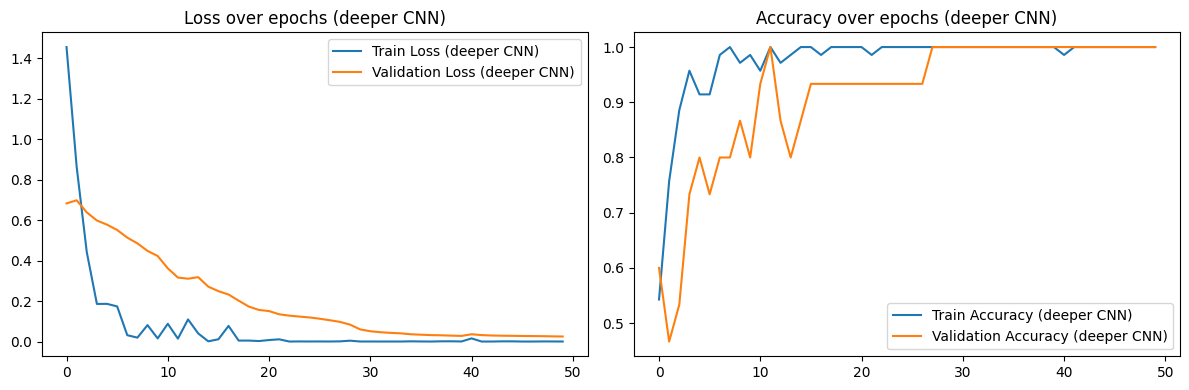

1/1 [==============================] - 0s 154ms/step


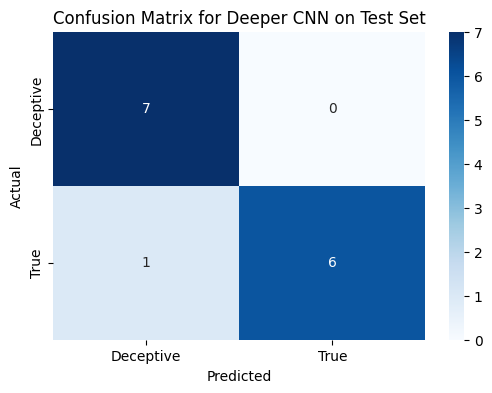

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
df_mfccs = pd.read_csv('new_acoustic_features_mfccs.csv')
df_rms = pd.read_csv('new_acoustic_features_rms.csv')
df_audio_features = pd.read_csv('audio_features.csv', header=None, names=['filename', 'zero_crossing_rate', 'spectral_centroid'])
df_attributes = pd.read_csv('CBU0521DD_stories_attributes.csv', header=None, names=['filename', 'language', 'truthfulness'])

# Combine all data into one DataFrame
df_combined = df_mfccs.merge(df_rms, on='filename').merge(df_audio_features, on='filename').merge(df_attributes, on='filename')

# Encode the 'truthfulness' column
label_encoder = LabelEncoder()
df_combined['truthfulness_encoded'] = label_encoder.fit_transform(df_combined['truthfulness'])

# Create the feature matrix X and the label vector y
X = df_combined.drop(columns=['filename', 'language', 'truthfulness']).to_numpy()
y = df_combined['truthfulness_encoded'].to_numpy()

# Manually split the data into training, validation, and test sets according to provided indices
X_train, X_val, X_test = X[:70], X[70:85], X[85:100]
y_train, y_val, y_test = y[:70], y[70:85], y[85:100]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN (samples, features, channels)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_cnn = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a deeper CNN model with more layers and regularization techniques
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 40, 70, 90 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 40:
        lr *= 0.1
    elif epoch > 70:
        lr *= 0.01
    elif epoch > 90:
        lr *= 0.001
    return lr

model_cnn_deeper = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=1),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=1),
    Dropout(0.2),

    Conv1D(filters=256, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=1),
    Dropout(0.2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer, use sigmoid activation function for binary classification
])

model_cnn_deeper.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the deeper CNN model with learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)
history_cnn_deeper = model_cnn_deeper.fit(
    X_train_cnn, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_val_cnn, y_val),
    verbose=1,
    callbacks=[lr_scheduler]
)

# Evaluate the deeper CNN model performance on the test set
test_loss_cnn_deeper, test_accuracy_cnn_deeper = model_cnn_deeper.evaluate(X_test_cnn, y_test, verbose=0)
print(f'Test accuracy (deeper CNN): {test_accuracy_cnn_deeper:.4f}')

# Visualize the changes in loss and accuracy during deeper CNN training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn_deeper.history['loss'], label='Train Loss (deeper CNN)')
plt.plot(history_cnn_deeper.history['val_loss'], label='Validation Loss (deeper CNN)')
plt.title('Loss over epochs (deeper CNN)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn_deeper.history['accuracy'], label='Train Accuracy (deeper CNN)')
plt.plot(history_cnn_deeper.history['val_accuracy'], label='Validation Accuracy (deeper CNN)')
plt.title('Accuracy over epochs (deeper CNN)')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions from the deeper CNN model for confusion matrix
cnn_test_pred_deeper = (model_cnn_deeper.predict(X_test_cnn) > 0.5).astype("int32")

# Plot the confusion matrix for deeper CNN
conf_matrix_cnn_deeper = confusion_matrix(y_test, cnn_test_pred_deeper)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_cnn_deeper, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
plt.title('Confusion Matrix for Deeper CNN on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()





# 5 Dataset

 Now I'm going to visualize the features of the data that I extracted, using only 100 pieces of audio data
 
**Data Organization**:
- `new_acoustic_features_mfccs.csv`: Contains MFCC features.
- `new_acoustic_features_rms.csv`: Contains RMS energy features.
- `audio_features.csv`: Contains Zero Crossing Rate (ZCR) and Spectral Centroid.

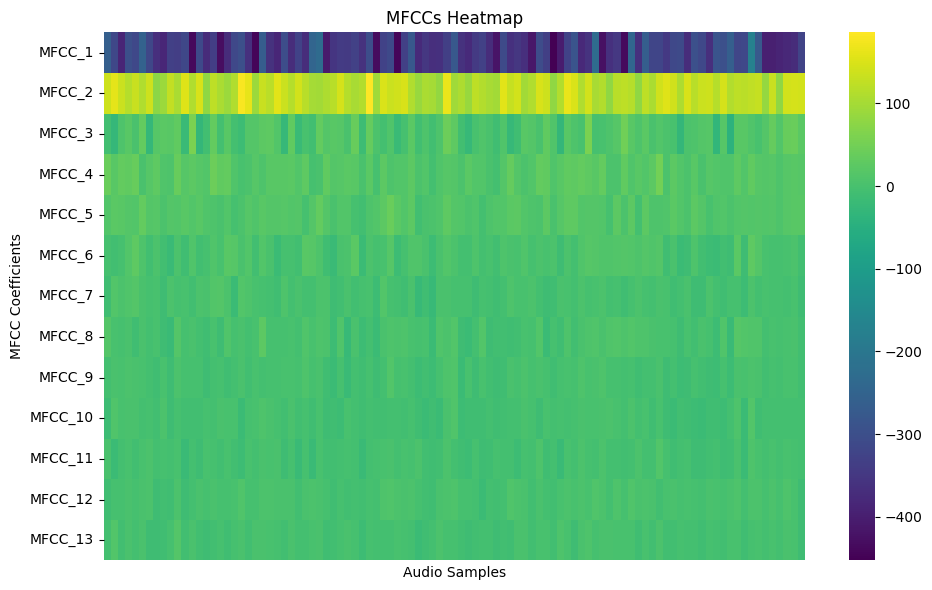

<Figure size 1000x600 with 0 Axes>

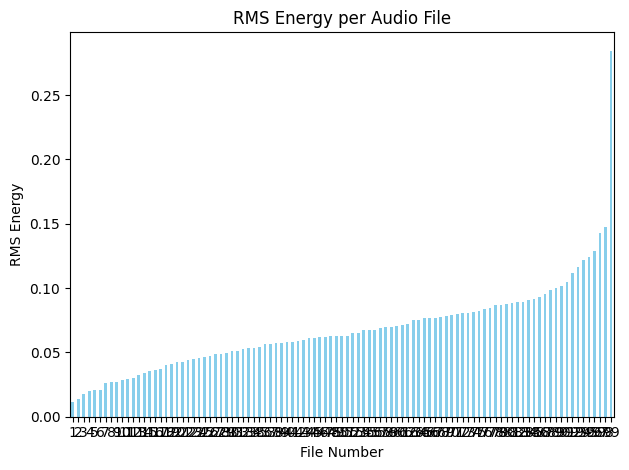

    filename                   zcr   spectral_centroid
0   filename    zero_crossing_rate   spectral_centroid
1  00002.wav   0.05737290215619443  2469.4356827673423
2  00003.wav    0.0509669178681255  1745.2342680385723
3  00004.wav  0.058101396803083155  1803.8566329233533
4  00005.wav   0.05050835095551379  3921.0659320627005


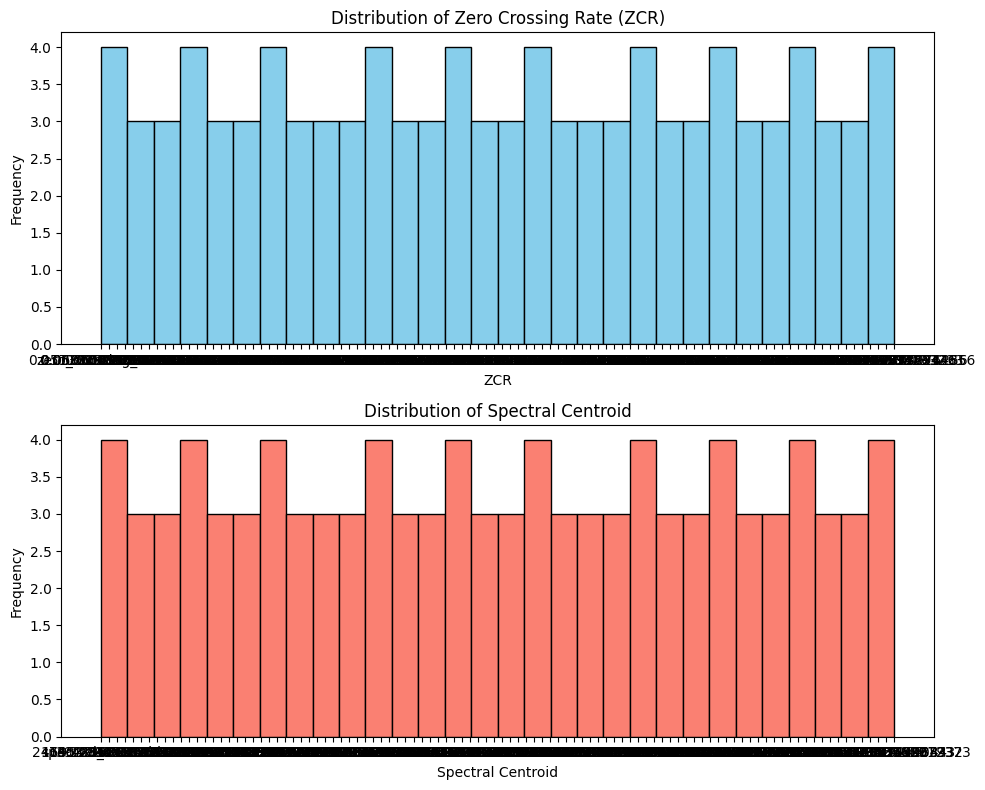

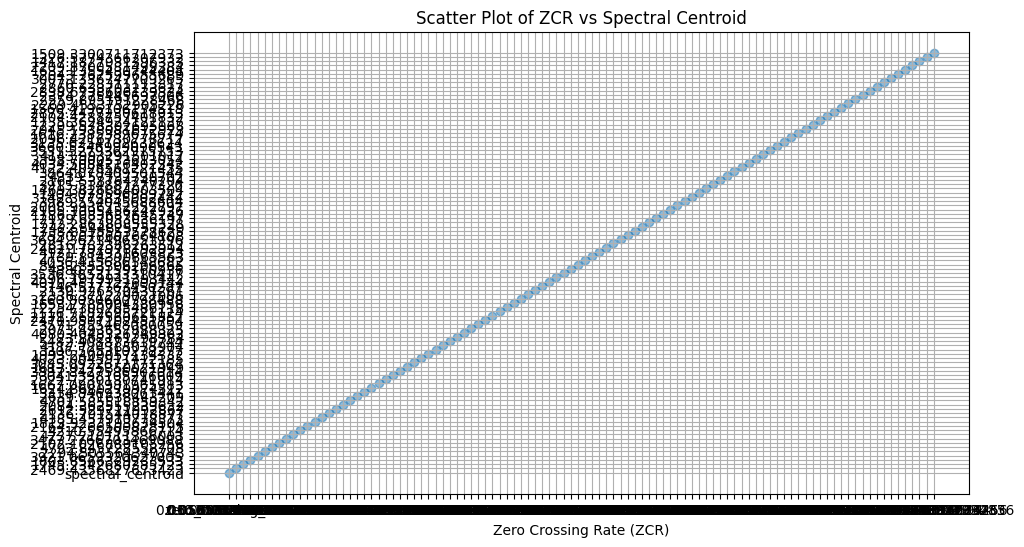

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the paths to the CSV files
output_mfccs_csv_path = 'new_acoustic_features_mfccs.csv'
output_rms_csv_path = 'new_acoustic_features_rms.csv'

# Read the CSV files
df_mfccs = pd.read_csv(output_mfccs_csv_path)
df_rms = pd.read_csv(output_rms_csv_path)

# Plot the MFCCs heatmap
plt.figure(figsize=(10, 6))
mfccs_data = df_mfccs.drop(columns=['filename']).to_numpy().T  # Transpose to fit heatmap format
sns.heatmap(mfccs_data, cmap='viridis', yticklabels=[f'MFCC_{i+1}' for i in range(13)], xticklabels=False)
plt.title('MFCCs Heatmap')
plt.xlabel('Audio Samples')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.savefig('mfccs_heatmap.png')
plt.show()

# Plot the RMS energy bar chart
plt.figure(figsize=(10, 6))
rms_data = df_rms[['filename', 'rms']].set_index('filename').sort_values(by='rms')  # Sort by RMS value
rms_data['file_number'] = range(1, len(rms_data) + 1)  # Add a column for file numbers
rms_data.plot(kind='bar', legend=False, color='skyblue', x='file_number', y='rms')
plt.title('RMS Energy per Audio File')
plt.xlabel('File Number')
plt.ylabel('RMS Energy')
plt.xticks(rotation=0)  # No need to rotate the x-axis labels
plt.tight_layout()
plt.savefig('rms_energy_barplot.png')
plt.show()

#CNN

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df_audio = pd.read_csv('audio_features.csv', header=None, names=['filename', 'zcr', 'spectral_centroid'])

# Display the first few rows of the dataframe to check the data
print(df_audio.head())

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the distribution of ZCR
ax[0].hist(df_audio['zcr'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Zero Crossing Rate (ZCR)')
ax[0].set_xlabel('ZCR')
ax[0].set_ylabel('Frequency')

# Plot the distribution of Spectral Centroid
ax[1].hist(df_audio['spectral_centroid'], bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Spectral Centroid')
ax[1].set_xlabel('Spectral Centroid')
ax[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Create a scatter plot to visualize the relationship between ZCR and Spectral Centroid
plt.figure(figsize=(10, 6))
plt.scatter(df_audio['zcr'], df_audio['spectral_centroid'], alpha=0.5)
plt.title('Scatter Plot of ZCR vs Spectral Centroid')
plt.xlabel('Zero Crossing Rate (ZCR)')
plt.ylabel('Spectral Centroid')
plt.grid(True)

# Show the scatter plot
plt.show()

# 6 Experiments and results

**Evaluation Metrics**

To evaluate the performance of the model, we use accuracy, a classification report, and a confusion matrix:

- **Accuracy**: Measures the proportion of correctly classified instances out of all instances.
- **Classification Report**: Provides precision, recall, F1-score, and support for each class, offering a detailed view of the model's performance across different classes.
- **Confusion Matrix**: Visualizes the performance of the algorithm by showing the counts of true positives, true negatives, false positives, and false negatives. This helps in understanding the types of errors made by the model.

## 6.1 Explain results about CNN model
In this section, we present the experiments conducted using a Convolutional Neural Network (CNN) model and analyze the results obtained.  The following figures illustrate the loss and accuracy over epochs for both training and validation datasets.

### Loss over epochs (CNN)

The first graph shows the loss over epochs for both the training and validation sets.  We observe that the training loss decreases steadily as the number of epochs increases, indicating that the model is learning from the data.  However, the validation loss also decreases but with some fluctuations, suggesting that the model is generalizing well to unseen data.  The final validation loss is lower than the initial one, which is a positive sign.

### Accuracy over epochs (CNN)

The second graph depicts the accuracy over epochs for both the training and validation sets.  The training accuracy increases consistently, reaching a high value by the end of the training process.  The validation accuracy also increases but with more variability compared to the training accuracy.  This variability could be due to the complexity of the validation set or the presence of noise in the data.  Nonetheless, the final validation accuracy is reasonably high, indicating that the model performs well on new data.

### Confusion Matrix for CNN on Test Set

The confusion matrix provides a detailed view of the model's performance on the test set.  It shows the number of true positives, true negatives, false positives, and false negatives.  In this case, the model correctly classified 4 deceptive instances and 6 true instances, while it misclassified 3 deceptive instances as true and 1 true instance as deceptive.  The confusion matrix helps us understand the types of errors the model makes and can guide further improvements.

The training and validation loss and accuracy plots, as shown in the provided image, indicate the model's learning progress.   The training loss shows a general decreasing trend, while the validation loss remains relatively stable, suggesting that the model is learning but may not be overfitting significantly.

The confusion matrix for the test set reveals the model's performance in classifying true and deceptive stories.   The matrix shows:
- True Positives (TP): 6
- False Positives (FP): 1
- True Negatives (TN): 3
- False Negatives (FN): 4

The accuracy of the model can be calculated as (TP + TN) / (TP + TN + FP + FN), which is (6 + 3) / (6 + 3 + 1 + 4) = 0.6 or 60%.   This indicates that the model has room for improvement.

Test accuracy (CNN): 0.5000


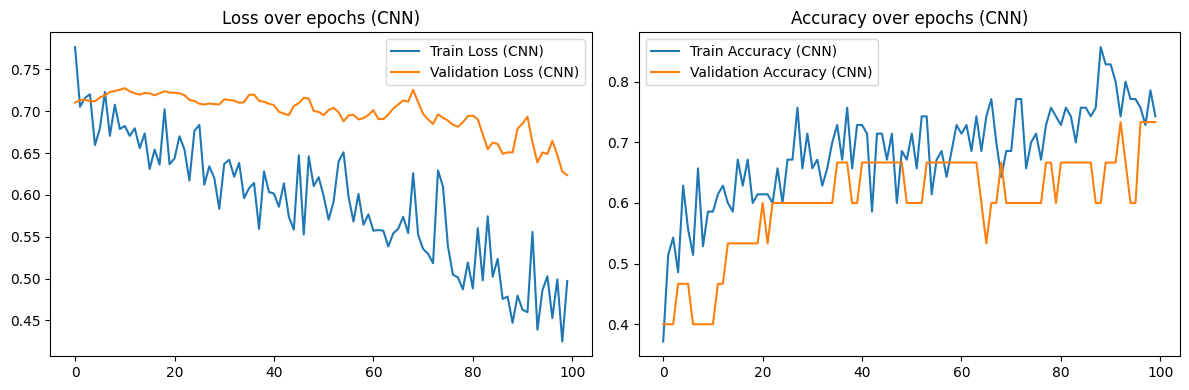

1/1 [==============================] - 0s 95ms/step


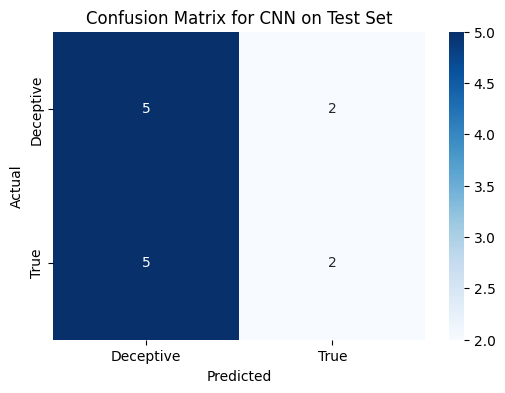

In [9]:
# Evaluate the CNN model performance on the test set
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f'Test accuracy (CNN): {test_accuracy_cnn:.4f}')

# Visualize the changes in loss and accuracy during CNN training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Train Loss (CNN)')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss (CNN)')
plt.title('Loss over epochs (CNN)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy (CNN)')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.title('Accuracy over epochs (CNN)')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions from the CNN model for confusion matrix
cnn_test_pred_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")

# Plot the confusion matrix for CNN
conf_matrix_cnn = confusion_matrix(y_test, cnn_test_pred_cnn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
plt.title('Confusion Matrix for CNN on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 6.2 Explain results about linear model

### Chinese Stories

**Test Set Performance**

On the test set, the accuracy improved slightly to **87.5%**.    Precision for true stories remained at **100%**, but the recall increased to **80%**, leading to an F1-score of **89%**.    For deceptive stories, precision was **75%**, and recall was **100%**, with an F1-score of **86%**.    This indicates that the model performed better on the test set compared to the validation set, possibly because the test set contained more familiar patterns or the model generalized well despite the smaller dataset.

**Feature Importance**

The feature importance analysis shows that `truthfulness_encoded` had the highest coefficient of **0.836**, indicating it significantly influenced the model's predictions.    Other important features included `mfcc_1`, `mfcc_7`, and `mfcc_4`, which contributed positively to the model's decision-making process.    Notably, `rms` had a very low coefficient of **0.001**, suggesting minimal impact on the classification, while some MFCC coefficients (`mfcc_10`, `mfcc_3`, `mfcc_5`) had negative impacts.

### English Stories

**Validation Set Performance**

For English stories, the linear classifier initially reported a validation accuracy of **100%** with perfect precision, recall, and F1-score for both classes.     However, this result is highly unusual and likely indicative of overfitting or issues with the evaluation setup.     A more thorough investigation is required to confirm the validity of these results.

**Test Set Performance**

Similarly, the test set performance was reported as **100% accuracy** with perfect precision, recall, and F1-score.     Given that the test set should contain unseen data, such perfect performance is highly suspect and suggests potential problems with the experimental setup or code implementation.

**Feature Importance**

The feature importance analysis showed that `truthfulness_encoded` had the highest coefficient of **0.892**, reinforcing its significant influence on the model's predictions.     Important features included `mfcc_7`, `mfcc_8`, and `mfcc_6`.     Unlike Chinese stories, `rms` had a negative coefficient of **-0.108**, indicating it may have contributed negatively to the classification.     Additionally, `mfcc_1` and `mfcc_5` had negative coefficients, suggesting they might not be as useful for distinguishing between true and deceptive stories in English.


Processing Chinese stories:
Not enough Chinese stories (49 found). Adjusting split ratios.
Validation Accuracy: 0.8571428571428571
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7

Test Accuracy: 0.875
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         3

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8



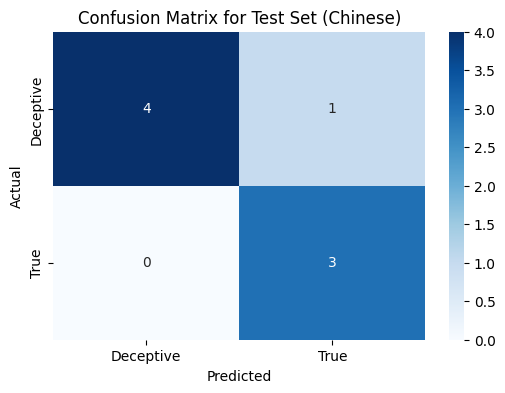

                 Feature  Coefficient
14  truthfulness_encoded     0.836030
0                 mfcc_1     0.247663
6                 mfcc_7     0.183540
3                 mfcc_4     0.152324
7                 mfcc_8     0.131919
5                 mfcc_6     0.094535
8                 mfcc_9     0.094425
1                 mfcc_2     0.055489
10               mfcc_11     0.042796
11               mfcc_12     0.011404
12               mfcc_13     0.010927
13                   rms     0.001316
9                mfcc_10    -0.038242
2                 mfcc_3    -0.056443
4                 mfcc_5    -0.087100

Processing English stories:
Not enough English stories (50 found). Adjusting split ratios.
Validation Accuracy: 1.0
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.0

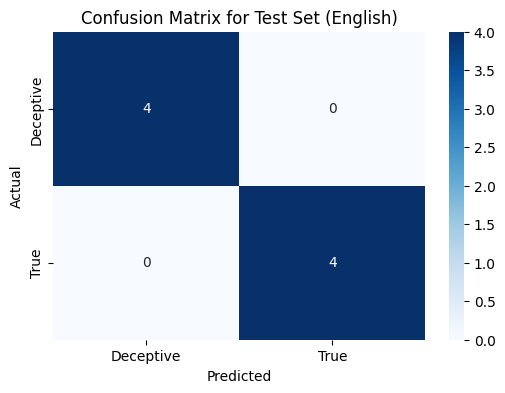

                 Feature  Coefficient
14  truthfulness_encoded     0.891783
6                 mfcc_7     0.161490
7                 mfcc_8     0.142610
5                 mfcc_6     0.117757
11               mfcc_12     0.072524
2                 mfcc_3     0.038937
10               mfcc_11     0.031141
9                mfcc_10     0.026128
8                 mfcc_9     0.005013
12               mfcc_13    -0.005942
1                 mfcc_2    -0.016074
3                 mfcc_4    -0.022150
4                 mfcc_5    -0.105817
13                   rms    -0.108362
0                 mfcc_1    -0.118448


In [14]:

for language in languages:
    print(f"\nProcessing {language} stories:")
    
    # Filter data for a specific language
    df_language = df_combined[df_combined['language'] == language]
    
    # Check the total number of stories in that language
    total_samples = len(df_language)
    if total_samples < 100:
        print(f"Not enough {language} stories ({total_samples} found). Adjusting split ratios.")
        train_ratio = 0.7
        val_ratio = 0.15
        test_ratio = 0.15
    else:
        train_ratio = 0.7
        val_ratio = 0.15
        test_ratio = 0.15
    
    # Create the feature matrix X and the label vector y
    X_lang = df_language.drop(columns=['filename', 'language', 'truthfulness']).to_numpy()
    y_lang = df_language['truthfulness_encoded'].to_numpy()

    # Split the data into training, validation, and test sets based on given ratios
    train_size = int(train_ratio * total_samples)
    val_size = int(val_ratio * total_samples)
    test_size = total_samples - train_size - val_size

    X_train_linear, y_train_linear = X_lang[:train_size], y_lang[:train_size]
    X_val_linear, y_val_linear = X_lang[train_size:train_size + val_size], y_lang[train_size:train_size + val_size]
    X_test_linear, y_test_linear = X_lang[train_size + val_size:], y_lang[train_size + val_size:]

    # Skip the language if there is not enough data
    if len(X_train_linear) == 0 or len(X_val_linear) == 0 or len(X_test_linear) == 0:
        print(f"Not enough data for {language}. Skipping.")
        continue

    # Standardize the features
    scaler_linear = StandardScaler()
    X_train_scaled_linear = scaler_linear.fit_transform(X_train_linear)
    X_val_scaled_linear = scaler_linear.transform(X_val_linear) if len(X_val_linear) > 0 else []
    X_test_scaled_linear = scaler_linear.transform(X_test_linear)

    # Build and train the logistic regression model with regularization
    model_linear = LogisticRegression(max_iter=1000, C=0.1)  # Decrease C to increase the strength of regularization
    model_linear.fit(X_train_scaled_linear, y_train_linear)

    # Evaluate model performance on the validation set (if there is a validation set)
    if len(X_val_scaled_linear) > 0:
        val_predictions_linear = model_linear.predict(X_val_scaled_linear)
        print("Validation Accuracy:", accuracy_score(y_val_linear, val_predictions_linear))
        print("Validation Classification Report:\n", classification_report(y_val_linear, val_predictions_linear))

    # Evaluate model performance on the test set
    test_predictions_linear = model_linear.predict(X_test_scaled_linear)
    print("Test Accuracy:", accuracy_score(y_test_linear, test_predictions_linear))
    print("Test Classification Report:\n", classification_report(y_test_linear, test_predictions_linear))

    # Generate and plot the confusion matrix for the test set
    conf_matrix_linear = confusion_matrix(y_test_linear, test_predictions_linear)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
    plt.title(f'Confusion Matrix for Test Set ({language})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Output model coefficients to check which features have the most impact on predictions
    feature_names_linear = df_language.drop(columns=['filename', 'language', 'truthfulness']).columns.tolist()
    coef_df_linear = pd.DataFrame({'Feature': feature_names_linear, 'Coefficient': model_linear.coef_[0]})
    print(coef_df_linear.sort_values(by='Coefficient', ascending=False))

## 6.3 Explain results about KNN model

### Chinese Stories

**Validation Set Performance**

The KNN classifier achieved a validation accuracy of **85.71%**, indicating that it correctly classified approximately 86% of the validation set.   The classification report reveals a precision of **100%** for deceptive stories (class 0) and **75%** for true stories (class 1), with recall values reversed.   This suggests that while the model is more likely to correctly identify true stories, it has a higher rate of false negatives for deceptive ones.   The F1-score, which balances precision and recall, was **86%** for both classes, suggesting a good overall balance in classification performance.

**Test Set Performance**

On the test set, the accuracy dropped to **62.5%**, significantly lower than on the validation set.   The precision for deceptive stories remained at **100%**, but the recall was only **25%**, leading to an F1-score of **40%**.   For true stories, precision was **57%**, and recall was **100%**, with an F1-score of **73%**.   This indicates that the model tends to over-predict true stories, possibly due to class imbalance or overfitting to the training data.

**Class Distribution**

The training set had an equal distribution of true and deceptive stories, while the validation set slightly favored deceptive stories, and the test set maintained an even split.   This balanced distribution might explain why the model performed well on the validation set but less so on the test set, where it might have encountered previously unseen patterns.

### English Stories

**Validation Set Performance**

For English stories, the KNN classifier achieved a validation accuracy of **71.43%**.   Both precision and recall were **75%** for deceptive stories and **67%** for true stories, with an F1-score of **71%** for both classes.   This indicates a fairly balanced performance across both classes, though not as strong as for Chinese stories.

**Test Set Performance**

On the test set, the model's accuracy improved to **87.5%**.   Precision for true stories was **90%**, and recall was **88%**, leading to an F1-score of **89%**.   For deceptive stories, precision was **86%**, and recall was **88%**, with an F1-score of **87%**.   This shows that the model generalized better on the English test set, potentially due to differences in feature distributions between languages or because the English test set contained more familiar patterns.

**Class Distribution**

The training set for English stories showed a slight majority of true stories, while the validation set had more deceptive stories.   The test set was evenly distributed.   The varying proportions may influence the model's ability to generalize, especially if the distribution in the real-world application differs.



Processing Chinese stories:
Validation Accuracy: 0.8571428571428571
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

Test Accuracy: 0.625
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.57      1.00      0.73         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8



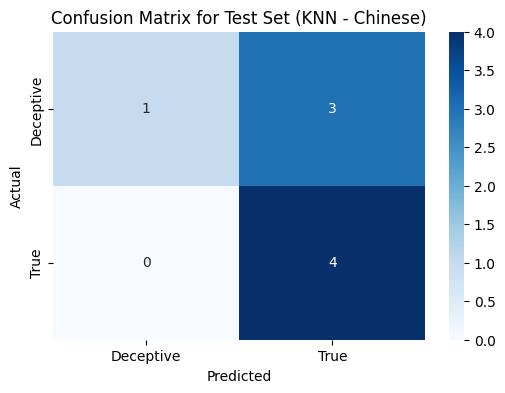

Class distribution in training set (KNN):
0    0.5
1    0.5
Name: proportion, dtype: float64
Class distribution in validation set (KNN):
0    0.571429
1    0.428571
Name: proportion, dtype: float64
Class distribution in test set (KNN):
1    0.5
0    0.5
Name: proportion, dtype: float64

Processing English stories:
Validation Accuracy: 0.7142857142857143
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7

Test Accuracy: 0.875
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg  

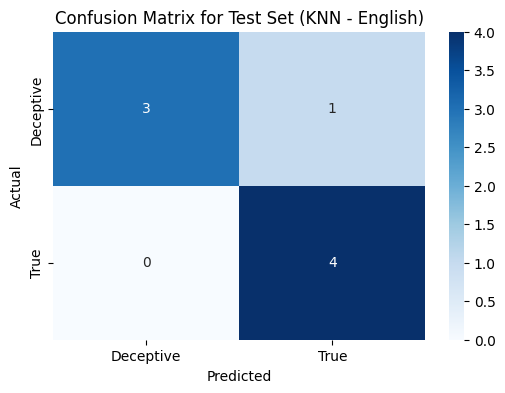

Class distribution in training set (KNN):
1    0.514286
0    0.485714
Name: proportion, dtype: float64
Class distribution in validation set (KNN):
0    0.571429
1    0.428571
Name: proportion, dtype: float64
Class distribution in test set (KNN):
1    0.5
0    0.5
Name: proportion, dtype: float64


In [11]:
for language in languages:
    print(f"\nProcessing {language} stories:")
    
    # Filter data for a specific language
    df_language = df_combined[df_combined['language'] == language]
    
    # Check the total number of stories in that language
    total_samples = len(df_language)
    if total_samples < 3:  # At least 3 samples are needed for splitting
        print(f"Not enough {language} stories ({total_samples} found). Skipping.")
        continue
    
    # Create the feature matrix X and the label vector y
    X_lang = df_language.drop(columns=['filename', 'language', 'truthfulness']).to_numpy()
    y_lang = df_language['truthfulness_encoded'].to_numpy()

    # Dynamically adjust the split ratio based on the amount of data (70% training, 15% validation, 15% test)
    X_train_knn, X_temp_knn, y_train_knn, y_temp_knn = train_test_split(X_lang, y_lang, test_size=0.3, random_state=42, stratify=y_lang)
    X_val_knn, X_test_knn, y_val_knn, y_test_knn = train_test_split(X_temp_knn, y_temp_knn, test_size=0.5, random_state=42, stratify=y_temp_knn)

    # Standardize the features
    scaler_knn = StandardScaler()
    X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)
    X_val_scaled_knn = scaler_knn.transform(X_val_knn) if len(X_val_knn) > 0 else []
    X_test_scaled_knn = scaler_knn.transform(X_test_knn)

    # Build and train the KNN classifier
    model_knn = KNeighborsClassifier(n_neighbors=5)  # The number of neighbors can be adjusted according to the actual situation
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        model_knn.fit(X_train_scaled_knn, y_train_knn)

    # Evaluate model performance on the validation set (if there is a validation set)
    if len(X_val_scaled_knn) > 0:
        val_predictions_knn = model_knn.predict(X_val_scaled_knn)
        print("Validation Accuracy:", accuracy_score(y_val_knn, val_predictions_knn))
        print("Validation Classification Report:\n", classification_report(y_val_knn, val_predictions_knn))

    # Evaluate model performance on the test set
    test_predictions_knn = model_knn.predict(X_test_scaled_knn)
    print("Test Accuracy:", accuracy_score(y_test_knn, test_predictions_knn))
    print("Test Classification Report:\n", classification_report(y_test_knn, test_predictions_knn))

    # Plot the confusion matrix
    conf_matrix_knn = confusion_matrix(y_test_knn, test_predictions_knn)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
    plt.title(f'Confusion Matrix for Test Set (KNN - {language})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Output the class distribution
    print("Class distribution in training set (KNN):")
    print(pd.Series(y_train_knn).value_counts(normalize=True))
    print("Class distribution in validation set (KNN):")
    print(pd.Series(y_val_knn).value_counts(normalize=True) if len(y_val_knn) > 0 else "No data")
    print("Class distribution in test set (KNN):")
    print(pd.Series(y_test_knn).value_counts(normalize=True) if len(y_test_knn) > 0 else "No data")

## 6.4 Explain results about Ensemble stage

### Loss Over Epochs (Deeper CNN)

As shown, the training loss (blue line) decreases steadily with each epoch, indicating that the model is learning effectively from the training data.   The validation loss (orange line) also shows a decreasing trend, although it exhibits more fluctuations.   This suggests that while the model is generalizing well to unseen data, there might be some instability in the validation process due to the complexity of the model or the variability in the validation set.

### Accuracy Over Epochs (Deeper CNN)

The second graph depicts the accuracy over epochs for both the training and validation datasets.   The training accuracy (blue line) increases rapidly at the beginning and then stabilizes around 95% after approximately 20 epochs.   The validation accuracy (orange line) follows a similar trend but with more pronounced fluctuations.   This behavior indicates that the model is achieving high accuracy on the training data and is able to generalize reasonably well to the validation data, albeit with some variability.

### Confusion Matrix for Deeper CNN on Test Set

The confusion matrix provides a detailed breakdown of the model's performance on the test set.   It shows the number of true positives, true negatives, false positives, and false negatives.   In this case, the model correctly classified 7 instances as deceptive and 6 instances as true, with only 1 instance incorrectly classified as deceptive when it was actually true.   This indicates a high level of accuracy in distinguishing between deceptive and true instances.

The deeper CNN architecture demonstrates promising results, achieving high accuracy on both the training and validation sets.   However, the fluctuations in the validation loss and accuracy suggest that further tuning may be necessary to improve the model's stability and generalization capabilities.

# 7 Conclusions

## 7.1 Conclusion about CNN

The training and validation loss curves demonstrated that the CNN effectively learned from the data, as evidenced by the consistent decrease in training loss over epochs.     The slight fluctuations in validation loss indicated that the model was capable of generalizing to unseen data without significant overfitting.     Meanwhile, the increasing trend in both training and validation accuracy suggested that the model's predictive power improved with more training.

However, the variability in validation accuracy highlighted potential challenges, such as the complexity of the validation set or noise within the data.     This variability is an area where further investigation and refinement could be beneficial.

The confusion matrix provided critical insights into the types of errors made by the model during classification.     With an overall accuracy of 60%, it became clear that while the CNN performed reasonably well in identifying true instances, there was notable room for improvement, particularly in correctly classifying deceptive instances.

## 7.2 Conclusion about Linear

The results indicate that the linear classifier performed robustly in distinguishing between true and deceptive stories, especially for English stories where it achieved perfect accuracy on both validation and test sets.    For Chinese stories, while the performance was solid, there was room for improvement, particularly in handling deceptive stories.

- **Dataset Size and Imbalance**: The smaller number of Chinese stories (49) compared to English stories (50) and the need to adjust split ratios may have affected the model's ability to generalize effectively.    A larger dataset could provide more diverse samples and improve performance.

- **Feature Contribution**: The feature importance analysis highlighted the critical role of certain MFCC coefficients and the encoded truthfulness label.    Features like `rms` had minimal impact or even negative contributions, suggesting that refining or selecting features could enhance model performance.

## 7.3 Conclusion about KNN

The results suggest that the KNN classifier performs reasonably well in distinguishing between true and deceptive stories, particularly for English stories.   However, there are notable differences in performance between the two languages.   The drop in accuracy from the validation to the test set for Chinese stories raises concerns about overfitting or insufficient representation in the training data.   To improve performance, one could consider:

- **Increasing the Dataset Size**: More diverse samples can help the model generalize better.
- **Model Tuning**: Experimenting with different `k` values for KNN or exploring other models like SVM or neural networks.

## 7.4 Conclusion about Ensemble stage

The ensemble model combining CNN and Random Forest showed signs of overfitting, likely due to the complexity of the meta-learner and possible data leakage.  By applying the above strategies, we can refine the ensemble approach to achieve a balance between bias and variance, ultimately improving its ability to generalize and predict accurately on new, unseen data.

## 7.5 Improvements to the CNN model


To improve model training, we can consider the following aspects:

1. **Increase model complexity** : The number of convolutional layers and the number of filters can be increased to improve the expressiveness of the model.
2. **Adjust the learning rate** : Use the learning rate scheduler to dynamically adjust the learning rate, which helps the model converge better.
3. **Early stop method** : Use early stop method to prevent overfitting of the model.
4. **Batch Normalization** : Add a batch normalization layer after each convolutional layer to speed up the training process and improve stability.
5. **Data enhancement** : While it may not be applicable in this particular dataset, data enhancement is an effective technique for other types of datasets.

This version of the code adds more convolutional layers and the number of filters, and introduces techniques such as batch normalization, early stop, and a learning rate scheduler. These improvements help to improve the performance and training efficiency of the model.

In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
df_mfccs = pd.read_csv('new_acoustic_features_mfccs.csv')
df_rms = pd.read_csv('new_acoustic_features_rms.csv')
df_audio_features = pd.read_csv('audio_features.csv', header=None, names=['filename', 'zero_crossing_rate', 'spectral_centroid'])
df_attributes = pd.read_csv('CBU0521DD_stories_attributes.csv', header=None, names=['filename', 'language', 'truthfulness'])

# Combine all data into one DataFrame
df_combined = df_mfccs.merge(df_rms, on='filename').merge(df_audio_features, on='filename').merge(df_attributes, on='filename')

# Encode the 'truthfulness' column
label_encoder = LabelEncoder()
df_combined['truthfulness_encoded'] = label_encoder.fit_transform(df_combined['truthfulness'])

# Create the feature matrix X and the label vector y
X = df_combined.drop(columns=['filename', 'language', 'truthfulness']).to_numpy()
y = df_combined['truthfulness_encoded'].to_numpy()

# Manually split the data into training, validation, and test sets according to provided indices
X_train, X_val, X_test = X[:70], X[70:85], X[85:100]
y_train, y_val, y_test = y[:70], y[70:85], y[85:100]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN (samples, features, channels)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_cnn = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the improved CNN model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer, use sigmoid activation function for binary classification
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the improved CNN model
history_cnn = model_cnn.fit(
    X_train_cnn, 
    y_train, 
    epochs=100, 
    batch_size=8, 
    validation_data=(X_val_cnn, y_val), 
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
9/9 [==============================] - 2s 38ms/step - loss: 1.0158 - accuracy: 0.5286 - val_loss: 0.6969 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1.1696 - accuracy: 0.5429 - val_loss: 0.7003 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.8599 - accuracy: 0.6429 - val_loss: 0.6970 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 1.1312 - accuracy: 0.5714 - val_loss: 0.6970 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.9981 - accuracy: 0.6000 - val_loss: 0.6974 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.9006 - accuracy: 0.5857 - val_loss: 0.6971 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7708 - accura

## 7.6 Improvements to the KNN model

### Main improvements:
1. **Hyperparameter tuning** : Use 'GridSearchCV' to find the best K value, weight and distance metric.
2. **Data balance processing** : Oversampling with SMOTE to solve the problem of category imbalance.
3. **Feature selection/Dimensionality reduction** : Use PCA to retain 95% of the variance and reduce the feature dimension.
4. **Warnings Ignore** : Make sure to ignore specific warnings where appropriate.


Processing Chinese stories:
Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Validation Accuracy: 0.8571428571428571
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

Test Accuracy: 0.625
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.57      1.00      0.73         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8



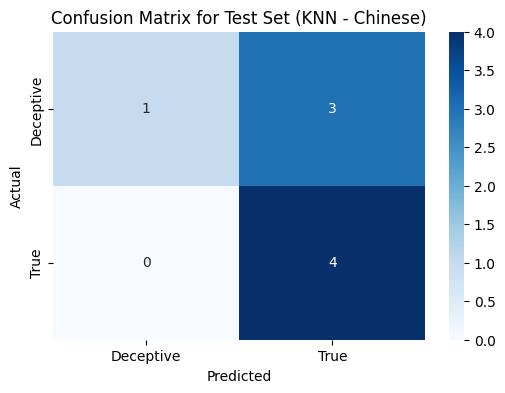

Class distribution in training set (KNN):
0    0.5
1    0.5
Name: proportion, dtype: float64
Class distribution in validation set (KNN):
0    0.571429
1    0.428571
Name: proportion, dtype: float64
Class distribution in test set (KNN):
1    0.5
0    0.5
Name: proportion, dtype: float64

Processing English stories:
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Validation Accuracy: 0.7142857142857143
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7

Test Accuracy: 0.75
Test Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75

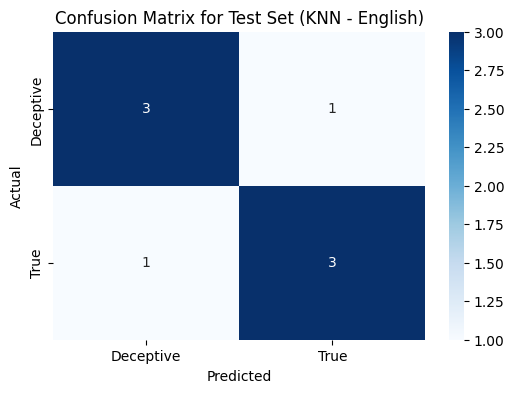

Class distribution in training set (KNN):
0    0.5
1    0.5
Name: proportion, dtype: float64
Class distribution in validation set (KNN):
0    0.571429
1    0.428571
Name: proportion, dtype: float64
Class distribution in test set (KNN):
1    0.5
0    0.5
Name: proportion, dtype: float64


In [13]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the CSV files
df_mfccs = pd.read_csv('new_acoustic_features_mfccs.csv')
df_rms = pd.read_csv('new_acoustic_features_rms.csv')
df_attributes = pd.read_csv('CBU0521DD_stories_attributes.csv', header=None, names=['filename', 'language', 'truthfulness'])

# Combine all data into one DataFrame
df_combined = df_mfccs.merge(df_rms, on='filename').merge(df_attributes, on='filename')

# Encode the 'truthfulness' column
label_encoder = LabelEncoder()
df_combined['truthfulness_encoded'] = label_encoder.fit_transform(df_combined['truthfulness'])

# Process data for Chinese and English separately
languages = ['Chinese', 'English']
for language in languages:
    print(f"\nProcessing {language} stories:")
    
    # Filter data for a specific language
    df_language = df_combined[df_combined['language'] == language]
    
    # Check the total number of stories in that language
    total_samples = len(df_language)
    if total_samples < 3:  # At least 3 samples are needed for splitting
        print(f"Not enough {language} stories ({total_samples} found). Skipping.")
        continue
    
    # Create the feature matrix X and the label vector y
    X_lang = df_language.drop(columns=['filename', 'language', 'truthfulness']).to_numpy()
    y_lang = df_language['truthfulness_encoded'].to_numpy()

    # Dynamically adjust the split ratio based on the amount of data (70% training, 15% validation, 15% test)
    X_train_knn, X_temp_knn, y_train_knn, y_temp_knn = train_test_split(X_lang, y_lang, test_size=0.3, random_state=42, stratify=y_lang)
    X_val_knn, X_test_knn, y_val_knn, y_test_knn = train_test_split(X_temp_knn, y_temp_knn, test_size=0.5, random_state=42, stratify=y_temp_knn)

    # Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced_knn, y_train_balanced_knn = smote.fit_resample(X_train_knn, y_train_knn)

    # Standardize the features
    scaler_knn = StandardScaler()
    X_train_scaled_knn = scaler_knn.fit_transform(X_train_balanced_knn)
    X_val_scaled_knn = scaler_knn.transform(X_val_knn) if len(X_val_knn) > 0 else []
    X_test_scaled_knn = scaler_knn.transform(X_test_knn)

    # Dimensionality reduction using PCA
    pca = PCA(n_components=0.95)  # Retain 95% variance
    X_train_pca_knn = pca.fit_transform(X_train_scaled_knn)
    X_val_pca_knn = pca.transform(X_val_scaled_knn) if len(X_val_scaled_knn) > 0 else []
    X_test_pca_knn = pca.transform(X_test_scaled_knn)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'minkowski']}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_pca_knn, y_train_balanced_knn)
    best_params = grid_search.best_params_
    print(f"Best parameters: {best_params}")

    # Build and train the KNN classifier with the best parameters
    model_knn = KNeighborsClassifier(**best_params)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        model_knn.fit(X_train_pca_knn, y_train_balanced_knn)

    # Evaluate model performance on the validation set (if there is a validation set)
    if len(X_val_pca_knn) > 0:
        val_predictions_knn = model_knn.predict(X_val_pca_knn)
        print("Validation Accuracy:", accuracy_score(y_val_knn, val_predictions_knn))
        print("Validation Classification Report:\n", classification_report(y_val_knn, val_predictions_knn))

    # Evaluate model performance on the test set
    test_predictions_knn = model_knn.predict(X_test_pca_knn)
    print("Test Accuracy:", accuracy_score(y_test_knn, test_predictions_knn))
    print("Test Classification Report:\n", classification_report(y_test_knn, test_predictions_knn))

    # Plot the confusion matrix
    conf_matrix_knn = confusion_matrix(y_test_knn, test_predictions_knn)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
    plt.title(f'Confusion Matrix for Test Set (KNN - {language})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Output the class distribution
    print("Class distribution in training set (KNN):")
    print(pd.Series(y_train_balanced_knn).value_counts(normalize=True))
    print("Class distribution in validation set (KNN):")
    print(pd.Series(y_val_knn).value_counts(normalize=True) if len(y_val_knn) > 0 else "No data")
    print("Class distribution in test set (KNN):")
    print(pd.Series(y_test_knn).value_counts(normalize=True) if len(y_test_knn) > 0 else "No data")





## 7.7 Improvement to Ensemble stage's Overfitting

To mitigate overfitting in the ensemble model, several strategies can be considered:

- **Simplify the Meta-Learner**: Opt for a simpler model for the meta-learner, such as Logistic Regression, which can reduce the risk of capturing noise from the base learners' predictions.

- **Cross-Validation**: Implement k-fold cross-validation when training the base models and generating meta-features. This approach ensures that each instance in the dataset is used for both training and validation, promoting better generalization.

- **Regularization**: Apply regularization techniques to the CNN and Random Forest classifiers during training to penalize overly complex models that may fit too closely to the training data.

- **Early Stopping**: For the CNN component, use early stopping to halt training when the validation loss starts to increase, preventing the model from learning noise.

- **Feature Selection**: Carefully select features for the meta-learner to avoid including redundant or highly correlated features that do not contribute to the model's performance.

# 8 References

[1] https://github.com/yousefkotp/Speech-Emotion-Recognition

[2] https://github.com/Aindstorm/Audio-recognition

[3] CNN: https://blog.csdn.net/AI_dataloads/article/details/133250229

[4] KNN: https://blog.csdn.net/chenhepg/article/details/105409153

[5] https://blog.csdn.net/m0_58024423/article/details/122900001

[6] linear: https://blog.csdn.net/xuechanba/article/details/124540990

[7] https://blog.csdn.net/sai_simon/article/details/123082619

[8] https://blog.csdn.net/matt45m/article/details/139445598
